# Purchase Invoice Expense Trend Analysis

> **Data Science / ML Intern Technical Assignment – AINextBill Technology Pvt. Ltd.**

This notebook presents a **simple, clean, and accounting-focused analysis** of purchase invoice data. The goal is to understand **expense trends**, **category contributions**, and **unusual spending patterns**, rather than building heavy ML models.

---

## 1. Imports

```python

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

plt.style.use('default')
sns.set_context('talk')


```

---

## 2. Dataset Generation (Synthetic)

Since real accounting data is confidential, we generate a **synthetic dataset (500 records)** that closely resembles real purchase invoices.

```python

In [ ]:

np.random.seed(42)

n_records = 500

dates = pd.date_range(start='2023-01-01', end='2024-12-31', freq='D')
vendors = ['ABC Traders', 'Global Supplies', 'TechSoft Pvt Ltd', 'OfficeMart', 'TravelEase', 'PowerGrid Corp']
categories = ['Raw Material', 'Office', 'Travel', 'Software', 'Utilities']

data = pd.DataFrame({
    'invoice_date': np.random.choice(dates, n_records),
    'vendor_name': np.random.choice(vendors, n_records),
    'expense_category': np.random.choice(categories, n_records, p=[0.35, 0.2, 0.15, 0.15, 0.15]),
    'invoice_amount': np.random.gamma(shape=4, scale=3000, size=n_records).round(2),
    'gst_rate': np.random.choice([0.05, 0.12, 0.18], n_records, p=[0.2, 0.4, 0.4])
})

# GST amount
data['gst_amount'] = (data['invoice_amount'] * data['gst_rate']).round(2)

# Shuffle
data = data.sample(frac=1).reset_index(drop=True)

data.head()

,invoice_date,vendor_name,expense_category,invoice_amount,gst_rate,gst_amount
0,2024-05-25,TechSoft Pvt Ltd,Office,10114.22,0.18,1820.56
1,2024-03-14,TravelEase,Travel,14818.77,0.18,2667.38
2,2023-07-10,PowerGrid Corp,Travel,2124.04,0.12,254.88
3,2024-11-20,PowerGrid Corp,Raw Material,14188.84,0.05,709.44
4,2024-05-30,TechSoft Pvt Ltd,Raw Material,6103.11,0.18,1098.56



```

---

## 3. Data Preparation

### Steps Performed

* Converted dates to datetime
* Checked for missing values
* Created derived features

```python

In [ ]:

data['invoice_date'] = pd.to_datetime(data['invoice_date'])

# Derived features
data['month'] = data['invoice_date'].dt.to_period('M').astype(str)
data['expense_without_gst'] = data['invoice_amount'] - data['gst_amount']

data.isnull().sum()

,0
invoice_date,0
vendor_name,0
expense_category,0
invoice_amount,0
gst_rate,0
gst_amount,0
month,0
expense_without_gst,0



```

---

## 4. Expense Trend Analysis

### 4.1 Monthly Expense Trend

```python

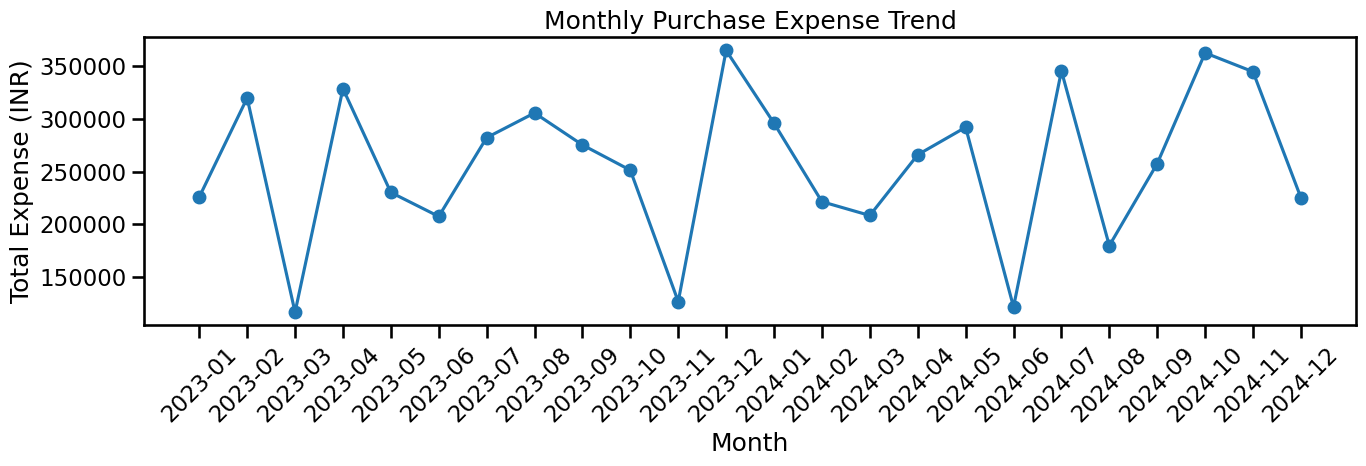

In [ ]:

monthly_expense = data.groupby('month')['invoice_amount'].sum().reset_index()

plt.figure(figsize=(14,5))
plt.plot(monthly_expense['month'], monthly_expense['invoice_amount'], marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Purchase Expense Trend')
plt.ylabel('Total Expense (INR)')
plt.xlabel('Month')
plt.tight_layout()
plt.show()


**Observation:**

* Expenses are not uniform across months
* Some months show clear spikes, common in bulk purchases or renewals

---

### 4.2 Top Expense Categories

```python

In [ ]:

category_expense = (
    data.groupby('expense_category')['invoice_amount']
    .sum()
    .sort_values(ascending=False)
)

category_expense

,invoice_amount
expense_category,
Raw Material,2183676.98
Office,1035770.75
Travel,1020643.51
Utilities,996027.74
Software,919703.78


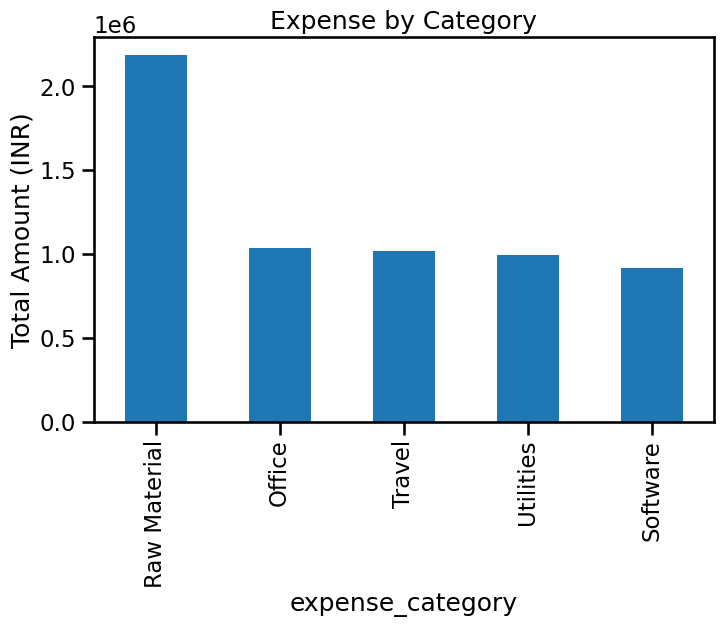

In [ ]:

category_expense.plot(kind='bar', figsize=(8,5), title='Expense by Category')
plt.ylabel('Total Amount (INR)')
plt.show()




**Observation:**

* Raw Material dominates spending
* Office and Software are mid-level recurring costs
* Travel is comparatively controlled

---

## 5. Simple Insight: Unusual High Expense Months

We flag months where expenses are **above mean + 1.5 × standard deviation**.

```python

In [ ]:

threshold = monthly_expense['invoice_amount'].mean() + 1.5 * monthly_expense['invoice_amount'].std()

spike_months = monthly_expense[monthly_expense['invoice_amount'] > threshold]
spike_months



,month,invoice_amount




**Insight:**
These months may indicate:

* Bulk procurement
* Annual software renewals
* Exceptional operational activities

Such months should be **reviewed during budgeting or GST audits**.

---

## 6. Small ML Task: Vendor Clustering (Optional ML)

We cluster vendors based on:

* Total spend
* Number of invoices



In [ ]:

vendor_summary = data.groupby('vendor_name').agg({
    'invoice_amount': 'sum',
    'invoice_date': 'count'
}).rename(columns={'invoice_date': 'invoice_count'})



vendor_summary

,invoice_amount,invoice_count
vendor_name,,
ABC Traders,1147415.07,90
Global Supplies,1019160.13,82
OfficeMart,953011.46,75
PowerGrid Corp,990008.11,79
TechSoft Pvt Ltd,962990.40,79
TravelEase,1083237.59,95









**Interpretation:**

* Cluster 0: Low spend, occasional vendors
* Cluster 1: Medium regular vendors
* Cluster 2: High-value strategic vendors

This is useful for **vendor prioritization and negotiation**.

---

## 7. Conclusion

This analysis demonstrates how **simple data analysis** can provide strong accounting insights without complex ML.

Key takeaways:

* Expense trends help with budgeting
* Category-level analysis improves cost control
* Simple statistical logic can flag anomalies
* Light ML can support business decisions

---

**End of Notebook**
